# Heart disesase prediction 

This project is created floowing the tutorial from Krish Naik youtube chanal. In this project, we will focus on the prediction of a person is suffering form the heart disease or not based on ML algorithms:
    
    1. KNN
    2. Decision tree 
    3. Random forest
    


# Start with importing libraries 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.cm import rainbow
#import warnings

#warnings.filterwarnings('ignor')
import seaborn as sns

/home/abay/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/abay/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Import sklearn algorithms 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# read the dataset that we found in kaggle 
df = pd.read_csv('heart.csv')

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Feature engineering 

-correlation 
- Mean, percentile and so on

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlation 

let us see the correlation between featurs 


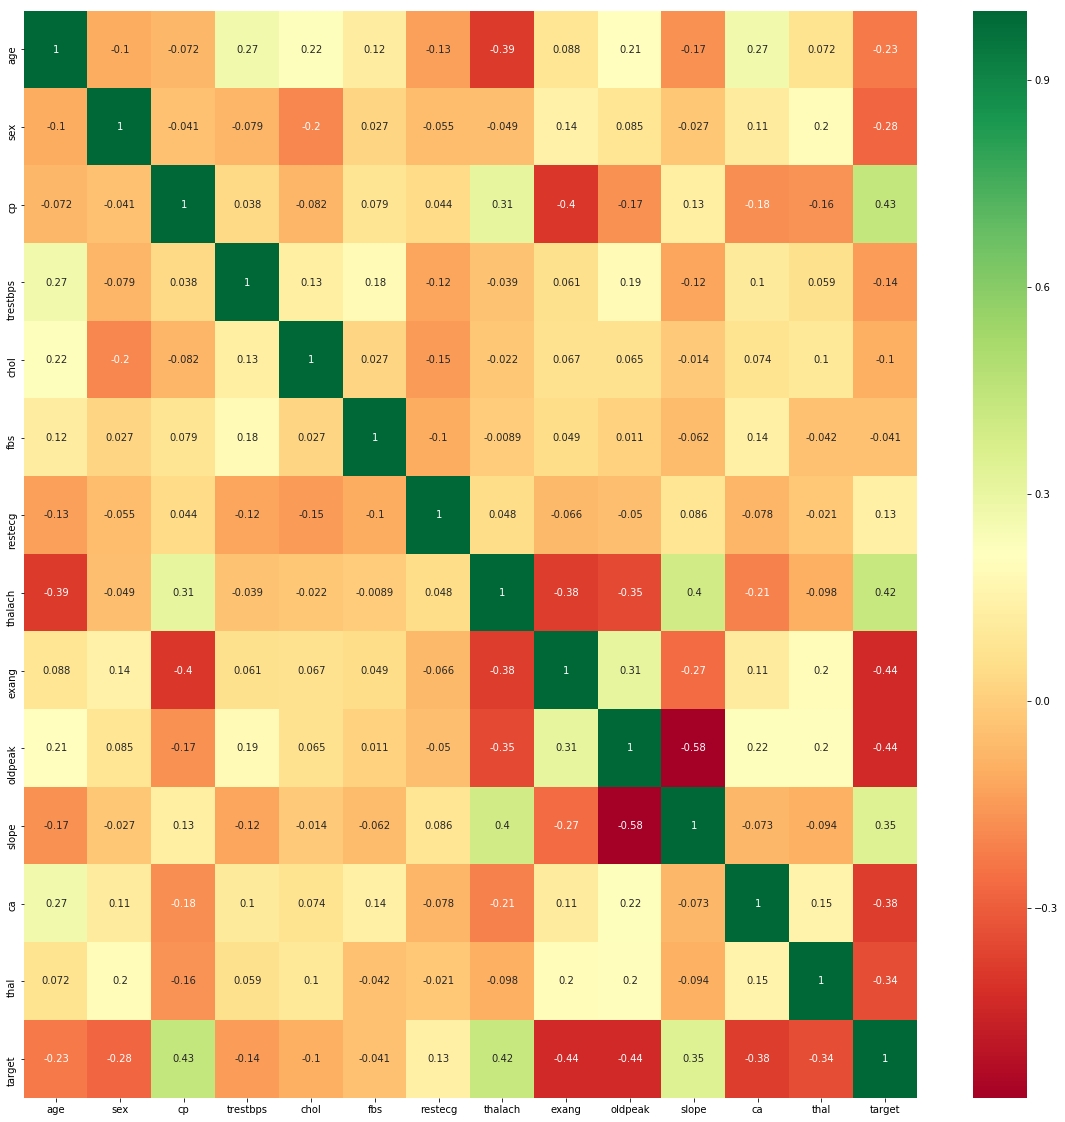

In [14]:
corr = df.corr()
top_corr_features = corr.index # index for correlated features 
plt.figure(figsize=(20,20))
heatmap_plot = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')


Histogram visualiation 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2ec74a50>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

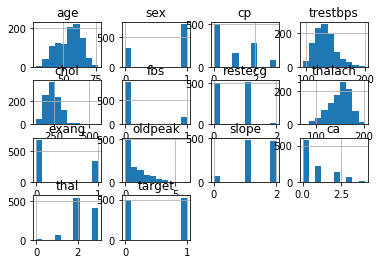

In [16]:
plt.figure(figsize=(20,20))

df.hist()

# Check the data balance 

It is good to work with balanced data of target.  If the data of target is  not balanced we have to apply undersampling or oversampling techniques to balance the data 


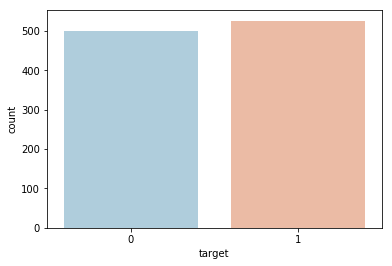

In [17]:
# plot the count of the 'target' feature 
sns.countplot(x='target', data= df, palette='RdBu_r')

- The target countplot shows that the data is balanced 
So no need of under/over sampling 


# Data processing 

Now it is possible to apply scaling/standardization techniques to work with the data. 

First of all let us convert categorical features to dummy variabls 


In [21]:
dataset = pd.get_dummies(df, columns =  ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal'])

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale 

The features that need to be scaled are ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] see the dataframe above 


In [23]:
Colms_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scalar = StandardScaler()

dataset[Colms_to_scale] = scalar.fit_transform(dataset[Colms_to_scale]) # standared scaling is used to scale the selected columns 


In [24]:
dataset.head()

,age,trestbps,chol,thalach,exang,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,0,-0.060888,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1,1.727137,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1,1.301417,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,0,-0.912329,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0,0.705408,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


# Create dependent and independent feature 


In [26]:
x = dataset.drop(['target'], axis = 1)
y = dataset['target']

Check cross validation 


In [29]:
from sklearn.model_selection import cross_val_score
knn_score = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, x,y, cv = 10)
    knn_score.append(score.mean())

# Visualize the score for KNN classifier 


Text(0.5, 1.0, 'KNN Classifier score for different K')

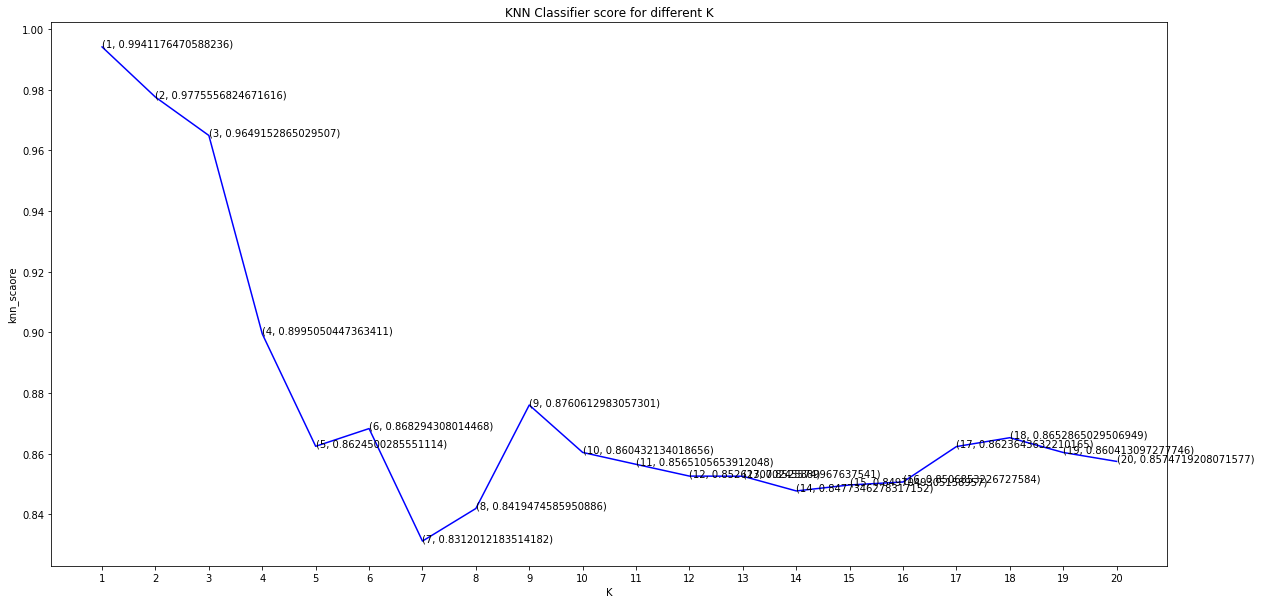

In [38]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,21)], knn_score, color = 'blue')
for k in range(1,21):
    plt.text(k, knn_score[k-1], (k, knn_score[k-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('K') # number of neighbors 
plt.ylabel('knn_scaore')
plt.title('KNN Classifier score for different K')

From the above plot we learn that the knn algorigh scores high accuracy for k=1. Now let us investigate further for $k=1$

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn_classifier, x,y, cv = 10)
score.mean()

0.9941176470588236

The knn calassifier is 99% acurrate for $k=1$

# Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 )

In [55]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
predit = knn_classifier.predict(x_test)

confusion_matrix(predit, y_test) 

array([[143,   0],
       [  0, 165]])

In [58]:
print(classification_report(predit, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       165

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



# Decision tree 

Below we will evaluate the decision tree algorighm to predict the heart disease 

In [73]:
dt = DecisionTreeClassifier()
score = dt.fit(x_train,y_train)
predDT  = dt.predict(x_test)
confusion_matrix(predDT, y_test)

array([[143,   0],
       [  0, 165]])

In [74]:
print(classification_report(predDT, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       165

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



# Random Forest

We apply a random forest algorithm with thirty estimators 

In [75]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)
predict_rf = rf.predict(x_test)
confusion_matrix(predict_rf, y_test)

array([[143,   0],
       [  0, 165]])

In [76]:
print(classification_report(predict_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       165

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



# Exercise 

Apply support vector machine 
